# Proyecto Introducción a la Ciencia de los Datos
**José Barrios - 20007192**

## Descripción general
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:
> y = f(x) = mx +b

Donde:
<br>y = la variable dependiente
<br>x = variable independiente
<br>m = pendiente de la recta(parámetro del modelo)
<br>b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos "x" y "y".

### Pasos solicitados
Los datos se encuentran dados en el formato binario de NumPy .npy por lo tanto usaremos la función “load” de numpy para poderlos utilizar:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

Instalar Numpy, Pandas, Seaborn para el notebook

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

In [2]:
data = np.load('proyecto_training_data.npy')

In [3]:
#'Revolvemos' la data para minimizar algún tipo de sesgo
#Esto reordena las filas, pero los valores en cada columna siguen siendo los mismos
np.random.shuffle(data)
data

array([[1.6000e+05, 6.0000e+00, 1.1160e+03, 5.0000e+00, 1.9620e+03,
        8.7000e+01],
       [1.4700e+05, 8.0000e+00, 1.7950e+03, 7.0000e+00, 2.0060e+03,
        7.5000e+01],
       [1.3500e+05, 5.0000e+00, 1.0480e+03, 6.0000e+00, 1.9560e+03,
        7.2000e+01],
       ...,
       [2.5900e+05, 7.0000e+00, 1.5300e+03, 7.0000e+00, 2.0040e+03,
        1.8200e+02],
       [1.2400e+05, 5.0000e+00, 1.0890e+03, 8.0000e+00, 1.8800e+03,
        5.0000e+01],
       [1.6175e+05, 6.0000e+00, 6.8900e+02, 6.0000e+00, 1.9770e+03,
               nan]])

In [4]:
data = pd.DataFrame(data = data, columns = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
data = data.astype({"SalePrice" : int, "OverallQual" : int, "1stFlrSF" : int, "TotRmsAbvGrd" : int, "YearBuilt" : int})
data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,160000,6,1116,5,1962,87.0
1,147000,8,1795,7,2006,75.0
2,135000,5,1048,6,1956,72.0
3,87000,5,840,5,1930,55.0
4,128000,5,1063,6,1954,80.0


In [5]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Procedemos a dividir la data en dos secciones: una para entrenamiento y otra para verificación del modelo.

Así que se procede a determinar cuántas filas tiene la data y así separar el 80% de ella para entrenamiento.

In [6]:
filas_entrenamiento = int(len(data) * 0.8)

print("Forma o tamaño: ", data.shape)
print("Filas para entrenamiento: ", filas_entrenamiento)

Forma o tamaño:  (1460, 6)
Filas para entrenamiento:  1168


In [7]:
data_entrenamiento = data[:filas_entrenamiento]

print("Forma o tamaño de data de entrenamiento: ", data_entrenamiento.shape)

Forma o tamaño de data de entrenamiento:  (1168, 6)


## Análisis exploratorio
Usando numpy, calcular los siguientes valores de cada variable de la data.
* Media
* Valor máximo
* Valor mínimo
* Rango
* Desviación estándar

In [8]:
media = np.nanmean(data_entrenamiento, axis=0)
maximo = np.nanmax(data_entrenamiento, axis=0)
minimo = np.nanmin(data_entrenamiento, axis=0)
rango = maximo - minimo
destandar = np.nanstd(data_entrenamiento, axis=0)

for i in range(len(media)):
    print('******************************************')
    print(data_entrenamiento.columns[i])
    print('Media: ', media[i])
    print('Máximo: ', maximo[i])
    print('Mínimo: ', minimo[i])
    print('Rango: ', rango[i])
    print('Desviación estándar: ', destandar[i])

******************************************
SalePrice
Media:  179991.12243150684
Máximo:  755000.0
Mínimo:  35311.0
Rango:  719689.0
Desviación estándar:  79922.68715180086
******************************************
OverallQual
Media:  6.101883561643835
Máximo:  10.0
Mínimo:  1.0
Rango:  9.0
Desviación estándar:  1.3992646846379657
******************************************
1stFlrSF
Media:  1150.55051369863
Máximo:  3138.0
Mínimo:  372.0
Rango:  2766.0
Desviación estándar:  369.1140947107272
******************************************
TotRmsAbvGrd
Media:  6.52054794520548
Máximo:  14.0
Mínimo:  3.0
Rango:  11.0
Desviación estándar:  1.636355699024101
******************************************
YearBuilt
Media:  1971.4280821917807
Máximo:  2010.0
Mínimo:  1872.0
Rango:  138.0
Desviación estándar:  29.843110866413127
******************************************
LotFrontage
Media:  69.31217481789803
Máximo:  174.0
Mínimo:  21.0
Rango:  153.0
Desviación estándar:  21.712441648173012


Para cada variable en el dataset usar seaborn (función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

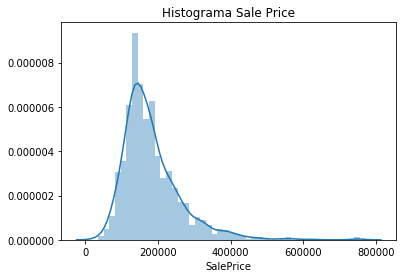

In [79]:
#SalePrice
sns.distplot(data_entrenamiento['SalePrice'])
plt.title('Histograma Sale Price')
plt.show()

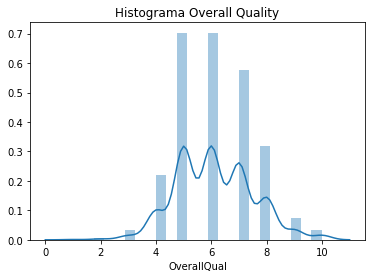

In [80]:
#OverallQual
sns.distplot(data_entrenamiento['OverallQual'])
plt.title('Histograma Overall Quality')
plt.show()

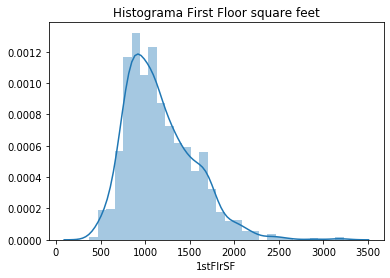

In [81]:
#1stFlrSF
sns.distplot(data_entrenamiento['1stFlrSF'])
plt.title('Histograma First Floor square feet')
plt.show()

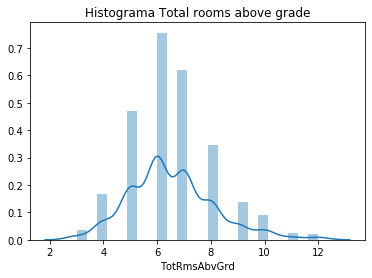

In [82]:
#TotRmsAbvGrd
sns.distplot(data_entrenamiento['TotRmsAbvGrd'])
plt.title('Histograma Total rooms above grade')
plt.show()

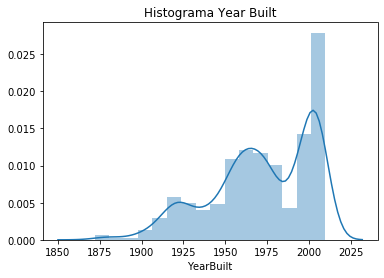

In [83]:
#YearBuilt
sns.distplot(data_entrenamiento['YearBuilt'])
plt.title('Histograma Year Built')
plt.show()

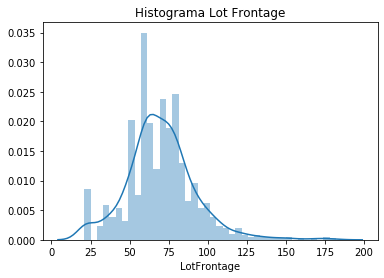

In [84]:
#LotFrontage
sns.distplot(data_entrenamiento['LotFrontage'])
plt.title('Histograma Lot Frontage')
plt.show()

### Correlación entre variables
Para cada variable independiente x:
* Calcular el coeficiente de correlación entre x y _y_ 
* Graficar x vs y (scatterplot) usando matplotlib
* Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica

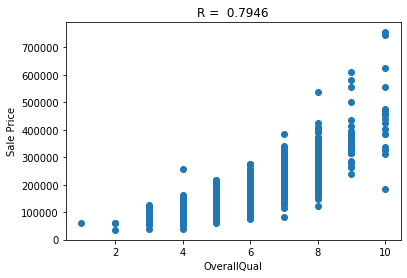

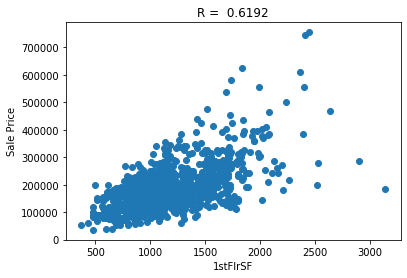

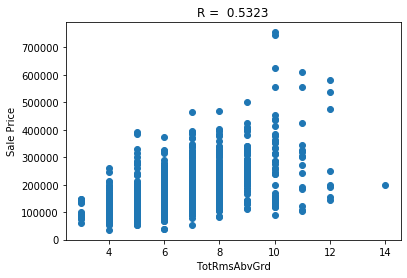

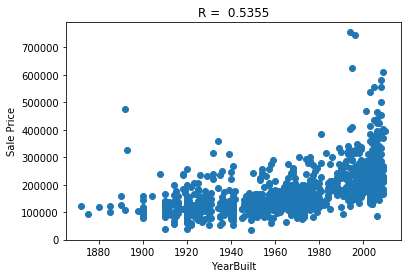

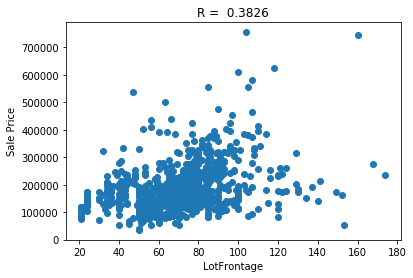

In [9]:
for col in data_entrenamiento.columns:
    if(col != 'SalePrice'):
        cor = round(data_entrenamiento['SalePrice'].corr(data_entrenamiento[col]),4)
        titulo = "R =  " + str(cor)
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(data_entrenamiento[col], data_entrenamiento["SalePrice"])
        ax.set_xlabel(col)
        ax.set_ylabel("Sale Price")
        ax.set_title(titulo)
        ax.set_aspect('auto')
    
plt.show()

## Variables seleccionadas
Según las correlaciones entre variables de la sección anterior, se seleccionan:
* OverallQual (R = 0.7878)
* 1stFlrSF    (R = 6244)

Se crea una función para entrenar un modelo de regresión lineal de una variable
> y = mx +b

La función recibe como argumentos:
* Vector con  la variable independiente “x”
* Vector con la variable dependiente “y”
* Un entero “epochs” que indica por cuantas iteraciones entrenar el modelo
* Un entero  “imprimir_error_cada”, que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
* Escalar lr (learning rate): es usado como parte de la expresión matemáticapara actualizar en cada iteración los parámetros del modelo.

In [104]:
def train_model(arr_x, arr_y, epochs, imprimir_error_cada, lr):
    m = 0.0
    b = 0.0
    x = np.vstack(arr_x) #Convertir la variable independiente a un array vertical
    y = np.array(arr_y) 
    
    matriz = np.hstack((x, np.ones_like(x))) #Matriz de dos columnas con n filas
    matrizh = np.transpose(matriz) #Matriz con 2 filas y n columnas
    
    parametros = np.array([m, b])
    errores = []
    dict_parametros = {}
    
    for i in range(1, epochs + 1):
        y_hat = np.dot(matriz, parametros)
        diferencia = y_hat - y
        
        error = 0.5 * (np.mean((diferencia)**2))
        errores.append(error)
        gradientes = (diferencia * matrizh).mean(1)
        
        parametros -= (lr * gradientes)
        dict_parametros[i] = parametros
        
        if i % imprimir_error_cada == 0:
            print("Iteración ", i, "  Error: ",error)
            
    return errores, dict_parametros
        
        

In [107]:
train_model(data_entrenamiento['OverallQual'], data_entrenamiento['SalePrice'], 10, 5, 0.00001)

Iteración  5 : - Error:  19386453981.98145


([19392220037.85916,
  19390778350.28822,
  19389336778.45781,
  19387895322.358658,
  19386453981.98145,
  19385012757.31691,
  19383571648.355743,
  19382130655.08866,
  19380689777.506374],
 {1: array([10.68261516,  1.61965287]),
  2: array([10.68261516,  1.61965287]),
  3: array([10.68261516,  1.61965287]),
  4: array([10.68261516,  1.61965287]),
  5: array([10.68261516,  1.61965287]),
  6: array([10.68261516,  1.61965287]),
  7: array([10.68261516,  1.61965287]),
  8: array([10.68261516,  1.61965287]),
  9: array([10.68261516,  1.61965287])})

Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de erroresgenerados por la función de entrenamiento y grafique en el eje “x” el número deiteración y en el eje “y”  el error para esa iteración

In [115]:
def grafico_perdida(arr_x, arr_y, epochs, imprimir_error_cada, lr):
    x, y = train_model(arr_x, arr_y, epochs, imprimir_error_cada, lr)
    plt.plot(np.linspace(0, len(y), len(y)), x)
    plt.title('Error por iteración')
    plt.show()

Iteración  10000 : - Error:  9480998779.971502
Iteración  20000 : - Error:  5039530141.450773
Iteración  30000 : - Error:  3049409075.8246
Iteración  40000 : - Error:  2157604916.1056128
Iteración  50000 : - Error:  1757897520.3179643
Iteración  60000 : - Error:  1578672305.287779
Iteración  70000 : - Error:  1498233410.5045362
Iteración  80000 : - Error:  1462055477.6019804
Iteración  90000 : - Error:  1445708631.140849
Iteración  100000 : - Error:  1438247160.064931
Iteración  110000 : - Error:  1434766880.8639677
Iteración  120000 : - Error:  1433070493.0093033
Iteración  130000 : - Error:  1432173504.3921201
Iteración  140000 : - Error:  1431634817.0116758
Iteración  150000 : - Error:  1431256798.4896102
Iteración  160000 : - Error:  1430950900.2753808
Iteración  170000 : - Error:  1430677448.404481
Iteración  180000 : - Error:  1430418666.9812167
Iteración  190000 : - Error:  1430166591.4548078
Iteración  200000 : - Error:  1429917653.2096303
Iteración  210000 : - Error:  14296702

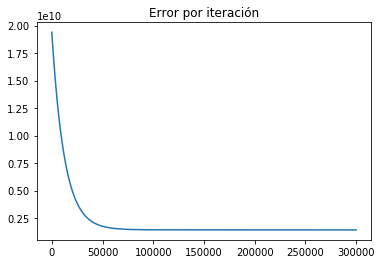

In [119]:
grafico_perdida(data_entrenamiento['OverallQual'], data_entrenamiento['SalePrice'], 300000, 50000, 0.000001)